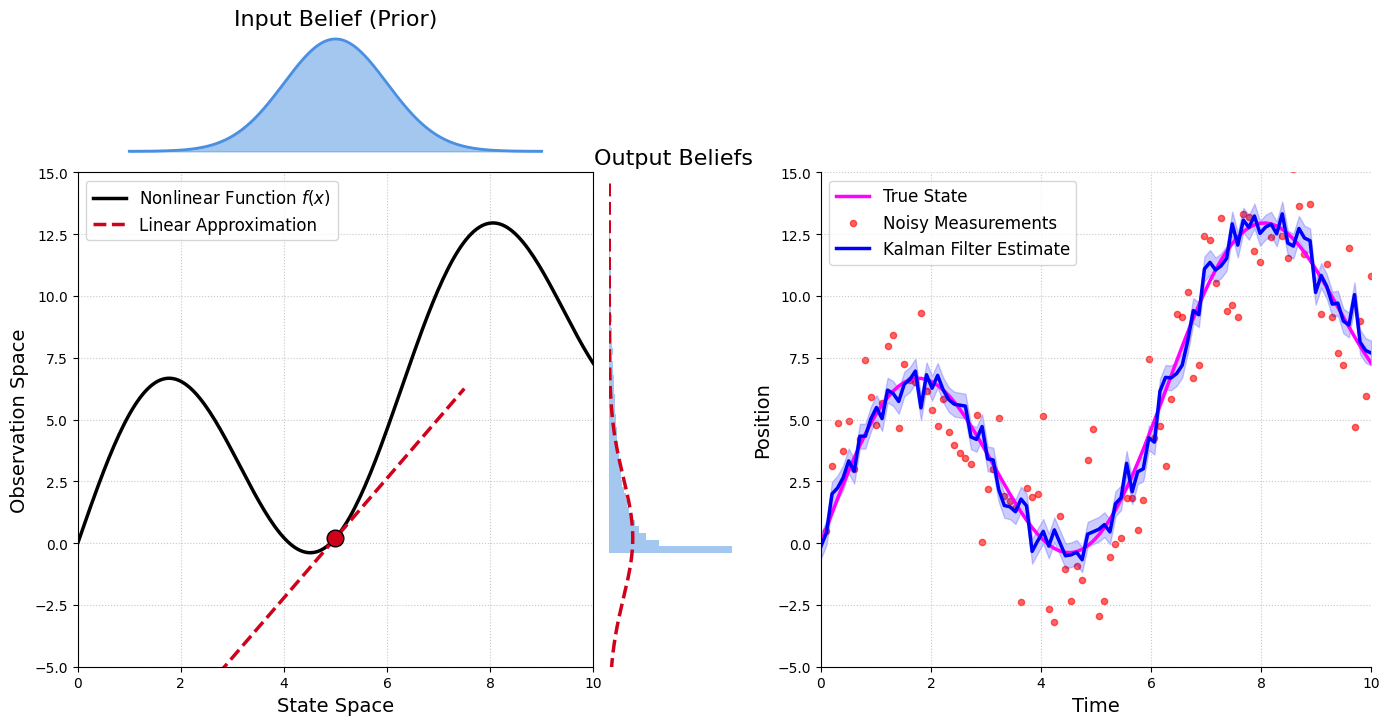

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.gridspec as gridspec

# Define the shared nonlinear function
def f(x):
    return np.sin(x) * 5 + x

def df(x):
    return np.cos(x) * 5 + 1

# Seed for reproducibility
np.random.seed(42)

fig = plt.figure(figsize=(14, 8), facecolor='white')

# Create a 1x2 GridSpec for the two main plots
gs_main = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[1.2, 1])

# --- Part (a): EKF Linearization Concept (Left Plot) ---
gs_left = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs_main[0],
                                            width_ratios=(4, 1), height_ratios=(1, 4),
                                            hspace=0.05, wspace=0.05)

ax_main = fig.add_subplot(gs_left[1, 0])
ax_in = fig.add_subplot(gs_left[0, 0], sharex=ax_main)
ax_out = fig.add_subplot(gs_left[1, 1], sharey=ax_main)

# Use the same function for linearization example
mu_x, sigma_x = 5.0, 1.0
x_dist = norm(mu_x, sigma_x)

# Propagate uncertainty
mu_y = f(mu_x)
J = df(mu_x)
sigma_y_ekf = abs(J) * sigma_x
y_dist_ekf = norm(mu_y, sigma_y_ekf)

# True propagation via Monte Carlo for comparison
x_samples = x_dist.rvs(50000)
y_samples_true = f(x_samples)

# Plot Input Belief (Top)
x_range = np.linspace(mu_x - 4*sigma_x, mu_x + 4*sigma_x, 500)
ax_in.fill_between(x_range, x_dist.pdf(x_range), color='#4A90E2', alpha=0.5)
ax_in.plot(x_range, x_dist.pdf(x_range), color='#4A90E2', lw=2)
ax_in.set_title("Input Belief (Prior)", fontsize=16)
ax_in.axis('off')

# Plot Output Beliefs (Right)
y_range = np.linspace(mu_y - 4*sigma_y_ekf*1.5, mu_y + 4*sigma_y_ekf*1.5, 500)
ax_out.hist(y_samples_true, bins=50, density=True, orientation='horizontal', color='#4A90E2', alpha=0.5, label='True Output')
ax_out.plot(y_dist_ekf.pdf(y_range), y_range, color='#D0021B', lw=2.5, ls='--', label='EKF Approx.')
ax_out.set_title("Output Beliefs", fontsize=16)
ax_out.axis('off')

# Plot Main Transformation
plot_x = np.linspace(0, 10, 200)
ax_main.plot(plot_x, f(plot_x), 'k', lw=2.5, label='Nonlinear Function $f(x)$')
tangent_x = np.array([mu_x - 2.5, mu_x + 2.5])
tangent_y = f(mu_x) + J * (tangent_x - mu_x)
ax_main.plot(tangent_x, tangent_y, color='#D0021B', ls='--', lw=2.5, label=f'Linear Approximation')
ax_main.plot(mu_x, mu_y, 'o', color='#D0021B', markersize=12, mec='k')
ax_main.set_xlabel("State Space", fontsize=14)
ax_main.set_ylabel("Observation Space", fontsize=14)
ax_main.legend(fontsize=12)
ax_main.grid(True, linestyle=':', alpha=0.7)
ax_main.set_xlim(0, 10)
ax_main.set_ylim(-5, 15)

# --- Part (b): Kalman Filter in Action (Right Plot) ---
gs_right = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs_main[1],
                                             height_ratios=(1, 4),
                                             hspace=0.05)

ax_right_top = fig.add_subplot(gs_right[0])
ax_right_top.axis('off')

ax_right = fig.add_subplot(gs_right[1])
ax_right.set_facecolor('white')

# Generate data using the same function
t = np.linspace(0, 10, 100)
true_state = f(t)  # Using the same nonlinear function
measurements = true_state + np.random.normal(0, 2, len(t))
estimate = true_state + np.random.normal(0, 0.5, len(t))  # Smoothed estimate (placeholder for actual KF)

# Plot lines
ax_right.plot(t, true_state, color='magenta', lw=2.5, label='True State')
ax_right.scatter(t, measurements, color='red', s=20, alpha=0.6, label='Noisy Measurements')
ax_right.plot(t, estimate, color='blue', lw=2.5, label='Kalman Filter Estimate')
ax_right.fill_between(t, estimate - 0.5, estimate + 0.5, color='blue', alpha=0.2)

# Aesthetics
ax_right.set_xlabel('Time', fontsize=14)
ax_right.set_ylabel('Position', fontsize=14)
ax_right.grid(True, linestyle=':', alpha=0.7)
ax_right.legend(loc='upper left', fontsize=12)
ax_right.spines['top'].set_visible(False)
ax_right.spines['right'].set_visible(False)
ax_right.set_xlim(0, 10)
ax_right.set_ylim(-5, 15)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('frontpage.png', dpi=300, facecolor='white')
plt.show()